# SuperStore Sales Exploratory Data Analysis with Python

## Scenario

Super Store is a family-owned retail business specializing in office supplies, furniture, and technology products. Operated by two owners, the business has experienced moderate growth but faces challenges in understanding its sales performance and customer behavior. The owners lack the technical expertise to interpret raw data or complex charts but are keen to explore how data analytics can optimize their operations.

The primary problem is the absence of an accessible, data-driven approach to decision-making. This gap leads to inefficiencies in inventory management, ineffective discounting strategies, and missed opportunities to cater to high-value customers. Without clear insights, the business struggles to maximize profit and customer loyalty in an increasingly competitive market.


## Purpose

The goal of this project is to provide actionable insights into the Super Store’s sales data through exploratory data analysis (EDA) and visualizations.

### Objectives:

The owners want to understand:

1. **Top-performing Product Categories:** They want to know which products drive the most revenue and profit to help them focus on items with the highest return.

2. **Seasonal Sales Trends:** Identifying peak times for certain products could help them manage inventory and anticipate demand.

3. **Customer Segmentation Analysis:** They would like to know who their most valuable customers are and whether certain customer segments are more profitable than others.

4. **Shipping Preferences:** Analyzing shipping modes to determine the most cost-effective and preferred delivery options for customers.

5. **Sales and Profit by Region:** Understanding regional performance will help them decide where to focus marketing and sales efforts.

6. **Discount Analysis:** The owners offer discounts regularly but are uncertain if discounts are helping or hurting profit. They want to know if there's an optimal discount rate that increases sales without eroding profit.


## Data Sources

The primary data source for this project is the **superstore.xls**, which contains the following fields:

- Order ID, Order Date, Ship Date, Ship Mode
- Customer ID, Customer Name, Segment
- Country, City, State, Postal Code, Region
- Product ID, Category, Sub-Category, Product Name
- Sale
- Discount
- Quantity
- Profit


## Deliverables

1. **EDA Report:** A concise PDF report summarizing key insights from the analysis with accompanying visualizations.
2. **Interactive Dashboard:** Hosted on a free platform like Streamlit Sharing for online access.
3. **User Training Documentation:** A step-by-step guide for using the dashboard.


## Installing and Loading Packages

## Prerequisites

- conda install anaconda::tabulate
- conda install conda-forge::plotly

In [1]:
# To update a package, run the following command in the terminal or command prompt:
# pip install -U package_name

# To install an exact version of a package, run the following command in the terminal or command prompt:
# !pip install package_name==desired_version

# After installing or updating the package, restart the Jupyter notebook.

#1. Install the `watermark` package.
#1.a. This package is used to record the versions of other packages used in this Jupyter notebook.
!pip install -q -U watermark

In [2]:
# Import the warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Essential libraries.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Libraries for Geographical Mapping

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Import Plotly Express

import plotly.express as px

In [4]:
# Showing all the columns available in dataset

pd.set_option('display.max_columns',250) # Showing all the columns available in dataset
pd.set_option('display.max_rows',300) # To display all the rows
pd.set_option('display.width',1000)
pd.set_option('display.float_format',  '{:,.4f}'.format) 

In [5]:
%reload_ext watermark
%watermark -a "AmeduStephen"

Author: AmeduStephen



## Data Acquisition

In [6]:
# Get the directory of the script's location, assumed here to be '../notebooks' and to be on the same folder level with '../data'
script_dir = os.getcwd()
# Please note that os.getcwd() depends on the current working directory, which might not always align with the script's location  

# Navigate to the parent folder
parent_dir = os.path.abspath(os.path.join(script_dir, ".."))

# Construct the path to the Excel file in the desired relative location
raw_data_path = os.path.join(parent_dir, "data", "raw", "superstore.xls")

# Read the Excel file into a DataFrame
df = pd.read_excel(raw_data_path, sheet_name="Orders", index_col="Row ID")

## Data Profiling

In this section, we will try to find information about the data types used, look at the datasets for inconsistent data formats, and identify missing values and duplications

In [7]:
# Displaying the top 5 rows of the dataframe
print("Top 5 rows of the dataset")
print("-"*30)
display(df.head())

# Displaying the top 5 rows of the dataframe
print("")
print("Bottom 5 rows of the dataset")
print("-"*30)
display(df.tail())

# Display the information of the dataframe
print("")
print("Summary of dataset")
print("-"*30)
display(df.info())

Top 5 rows of the dataset
------------------------------


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.0000,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.0000,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.4500,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2000,2.5164



Bottom 5 rows of the dataset
------------------------------


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.2000,4.1028
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.0000,15.6332
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.2000,19.3932
9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.0000,13.3200
9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.1600,2,0.0000,72.9480



Summary of dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 n

None

In [8]:
# Displaying the dimensions of the dataframe

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 9994 rows and 20 columns


In [9]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Duplicate rows in dataset: {duplicate_rows}")

    print("-"*30)

    # Display duplicates including the first occurrence
    print("")
    duplicates_incl_first = df[df.duplicated(keep=False)]
    display(duplicates_incl_first)    
else:
    print("No duplicates found in the dataset")



Duplicate rows in dataset: 1
------------------------------



,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.3720,2,0.3000,-12.0588
3407,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.3720,2,0.3000,-12.0588


In [10]:
# Check for null values in the dataset.

print("Number of null values per column")
print("-"*30)
display(df.isnull().sum())

# percentage of null values per column
#print("")
#print("Percentage of null values per column")
#print("-"*30)
#for i in df.columns:
#    null_rate = df[i].isna().sum()/len(df)*100
#    print("{} {}%".format(i,round(null_rate,2)))

Number of null values per column
------------------------------


Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
# Display summary statistics
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,"9,994.0000","9,994.0000","9,994.0000","9,994.0000","9,994.0000"
mean,"55,190.3794",229.8580,3.7896,0.1562,28.6569
std,"32,063.6934",623.2451,2.2251,0.2065,234.2601
min,"1,040.0000",0.4440,1.0000,0.0000,"-6,599.9780"
25%,"23,223.0000",17.2800,2.0000,0.0000,1.7288
50%,"56,430.5000",54.4900,3.0000,0.2000,8.6665
75%,"90,008.0000",209.9400,5.0000,0.2000,29.3640
max,"99,301.0000","22,638.4800",14.0000,0.8000,"8,399.9760"


In [12]:
# Get our date range for our data
print('Date Range: %s to %s' % (df['Order Date'].min(), df['Order Date'].max()))

Date Range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00


## Data Cleaning

In [13]:
# remove duplicate row
df = df.drop_duplicates()

# show number of duplicates (another method)
df.duplicated(keep=False).sum()

0

In [14]:
# show the new dimension of the dataset
df.shape

(9993, 20)

## Exploratory Analysis

In [15]:
# counts of unique 'Ship Mode'
df['Ship Mode'].value_counts()

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

From here we can see the most widely opted shipping mode is 'Standard Class' and the least used shipping mode is 'Same day'.

In [16]:
# counts of unique 'Segment'
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1782
Name: Segment, dtype: int64

From here we can tell that the 'Consumer' segment has a largest customer base, followed by 'Corporate' and 'Home Office' has least customer base.

In [17]:
# counts of unique 'Region'
df['Region'].value_counts()

West       3203
East       2847
Central    2323
South      1620
Name: Region, dtype: int64

From here we can tell that the order mostly came from 'West' region and least from the 'South' region.

In [18]:
# counts of unique 'Category'
df['Category'].value_counts()

Office Supplies    6026
Furniture          2120
Technology         1847
Name: Category, dtype: int64

As we can see 'Office Supplies' is the most popular category whereas 'Technology' is the least popular category.

In [19]:
# counts of unique 'Sub-Category'
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

There are various sub-category under each category. The most popular sub-category is 'Binders', followed by 'Paper', and the least popular sub-category is 'Copiers'.

In [20]:
# count of unique 'Country'
df['Country'].unique()

array(['United States'], dtype=object)

In [21]:
# all orders came from inside United States only, so the 'Country' column isn't of much use for further analysis
df.drop(columns="Country",inplace=True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.0000,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.0000,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.4500,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2000,2.5164


### Detecting Outliers

<AxesSubplot:xlabel='Discount'>

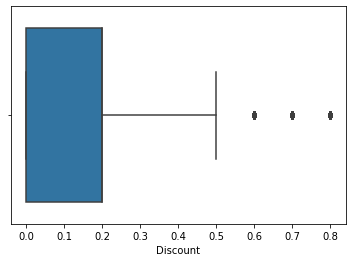

In [22]:
sns.boxplot(df['Discount'])

As we can see, there are wide variety of discounts. It may look like they are outliers but we can tell that discount varies by products and getting discount up to 0.8 is normal.

### Plotting categorical variables

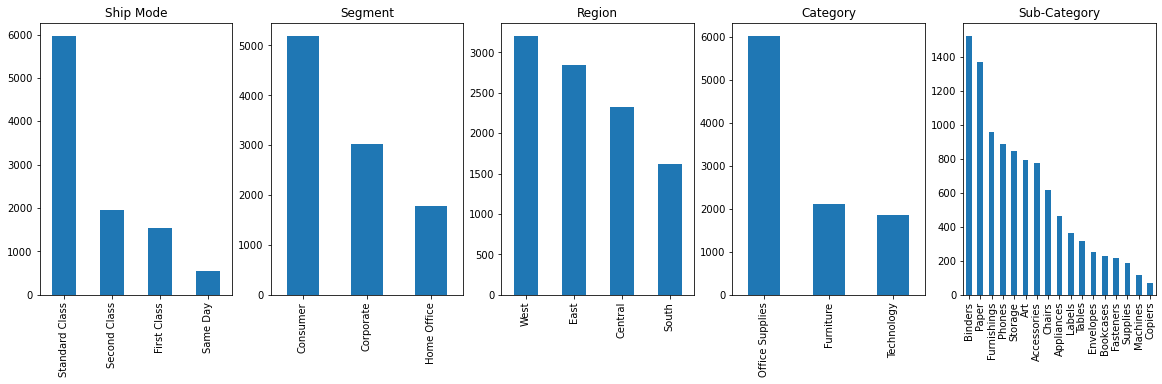

In [23]:
categorical_features = ['Ship Mode','Segment', 'Region', 'Category', 'Sub-Category']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i], figsize=(20,5)).set_title(categorical_feature)

Text(0.5, 1.0, 'Correlation Heatmap of Continuous Variables')

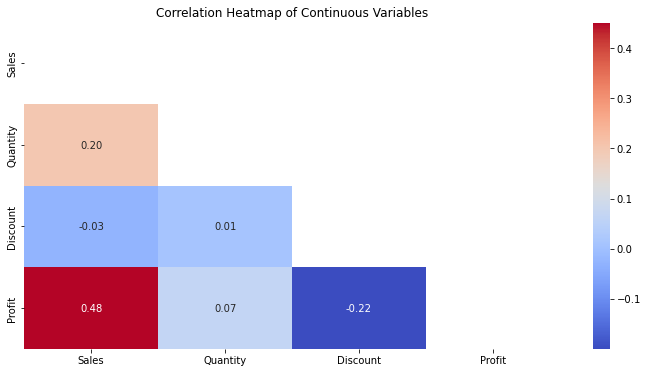

In [24]:
# Create a correlation heatmap
#df_corr = df.drop(['Postal Code'], axis=1).corr()
df_corr = df[['Sales','Quantity','Discount','Profit']].corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
df_corr = df_corr.mask(mask).round(3)
fig, ax = plt.subplots(figsize=(12,6))    
sns.heatmap(df_corr, robust=True, annot=True, ax=ax, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Continuous Variables')

### Product Category Analysis

Which Category is Best Selling and Most Profitable?

In [25]:
# Group sales, profit and quantity by category
category_analysis = df.groupby(['Category'])[['Quantity', 'Sales', 'Profit']].sum()
category_analysis

,Quantity,Sales,Profit
Category,,,
Furniture,8026,"741,718.4233","18,463.3316"
Office Supplies,22906,"719,047.0320","122,490.8008"
Technology,6939,"836,154.0330","145,454.9481"


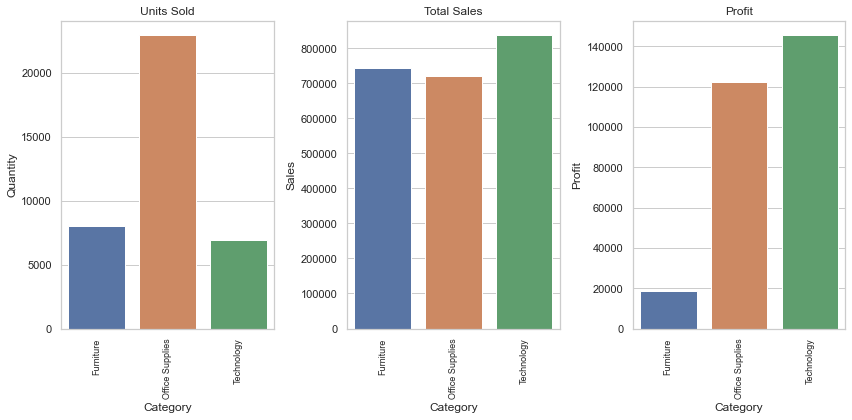

In [26]:
# Quantity, Sales and Profit per Category plot
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 6))
# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[2])
# Set titles
cat1.set(title = 'Units Sold')
cat2.set(title = 'Total Sales')
cat3.set(title = 'Profit')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

From the bar charts, we observe that:
- Office Supplies sells the most in terms of quantity, perhaps because it is relatively cheap product.
- Although, almost similar quantity is sold between Furniture and Technology, Furniture is the least profitable.
- Technology is Best Revenue Contributor and also the Most Profitable category. Only minimal quantity is sold, compared to other categories.



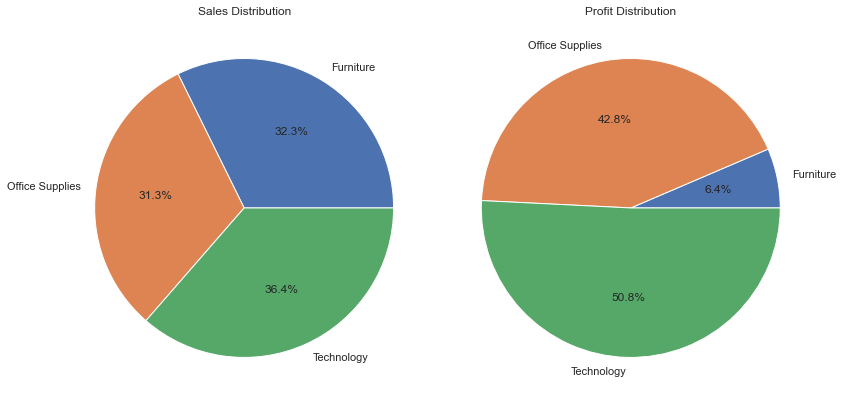

In [27]:
# Share of Sales and Profit per Category
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot pie charts for Sales & Profit
axis[0].pie(category_analysis.Sales, labels=category_analysis.Sales.index, autopct="%1.1f%%")
axis[0].set(title = 'Sales Distribution')

axis[1].pie(category_analysis.Profit, labels=category_analysis.Profit.index, autopct="%1.1f%%")
axis[1].set(title = 'Profit Distribution')

# Set spacing between subplots
figure.tight_layout()

The product portfolio demonstrates a balanced distribution across three primary categories: Technology (36.4%), Furniture (32.3%), and Office Supplies (31.3%). This near-equal distribution signifies a diverse customer base with varied needs.

However, the slight dominance of technology products indicates a potential growth trajectory in this sector, aligning with current market trends and consumer preferences. 

Low profitability of the Furniture products suggests the strategy around the category may need to be re-considered 

What are the Best Selling and Most Profitable Sub-Category?

In [28]:
# Group by sub-category
subcat_analysis = df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum()
# Sort by descending order according to sales
subcat_sales = subcat_analysis.sort_values('Sales', ascending = False)
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,"330,007.0540","44,515.7306"
Chairs,"328,167.7310","26,602.2251"
Storage,"223,843.6080","21,278.8264"
Tables,"206,965.5320","-17,725.4811"
Binders,"203,412.7330","30,221.7633"
Machines,"189,238.6310","3,384.7569"
Accessories,"167,380.3180","41,936.6357"
Copiers,"149,528.0300","55,617.8249"
Bookcases,"114,879.9963","-3,472.5560"


- Phones and Chairs are Top 2 best selling sub-category.
- Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
- On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price, or bargain for a lower price from the supplier.

array([<AxesSubplot:title={'center':'Profit'}, xlabel='Sub-Category'>,
       <AxesSubplot:title={'center':'Discount'}, xlabel='Sub-Category'>,
       <AxesSubplot:title={'center':'Sales'}, xlabel='Sub-Category'>],
      dtype=object)

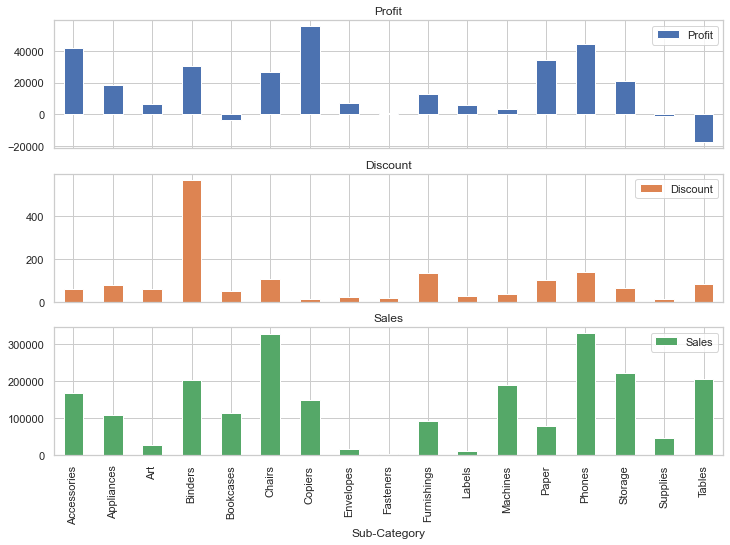

In [29]:
# Sales, profit amd discount in each Sub-Category
df.groupby("Sub-Category")[["Profit","Discount","Sales"]].sum().plot.bar(subplots=True,figsize=(12,8))

From the graphs, copiers, phones, and accessories earned huge profits. New and expensive phones could be showcased for sale. Tables, bookcases and supplies incurred losses, suggesting these items should be dropped from the catalog. The discount given to Binders was huge, and should be reduced

Which is the Top Selling Sub-Category?

In [30]:
subcat_quantity = df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False)
subcat_quantity

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2354
Appliances,1729


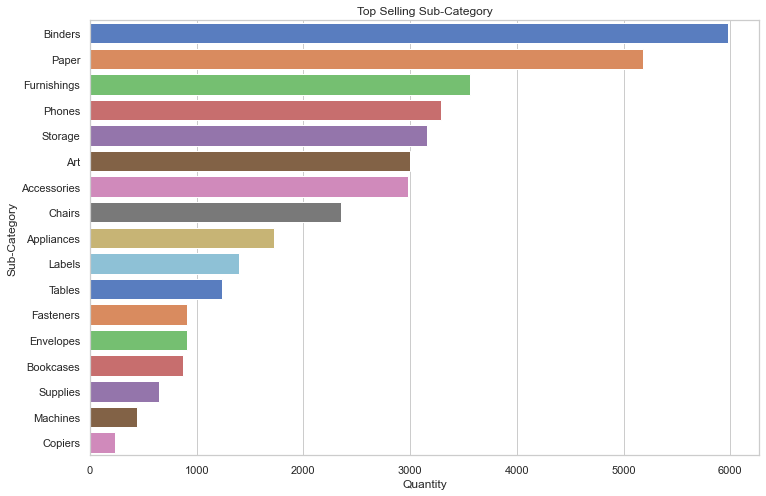

In [31]:
# Plot Bar Plot for Top Selling Sub-Category
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

From the bar chart, we can deduce that:
- Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.
- Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.

### Sales Trends

In [32]:
# convert order date to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

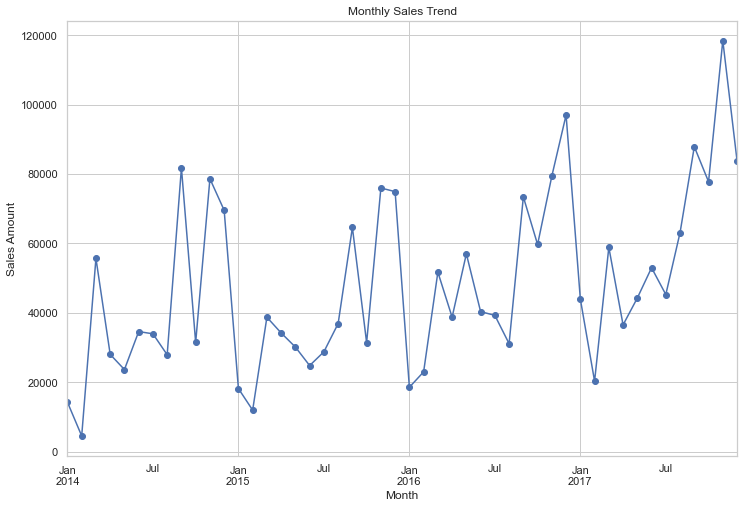

In [33]:
# Monthly Sales Trends - Group by months and calculate total sales

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 8))
monthly_sales.plot(kind='line', marker='o') 
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

The monthly sales data reveals a clear seasonal pattern, with pronounced peaks perhaps coinciding with holiday seasons. These peaks present a golden opportunity to maximize revenue through targeted campaigns, promotions, and limited-time offers.

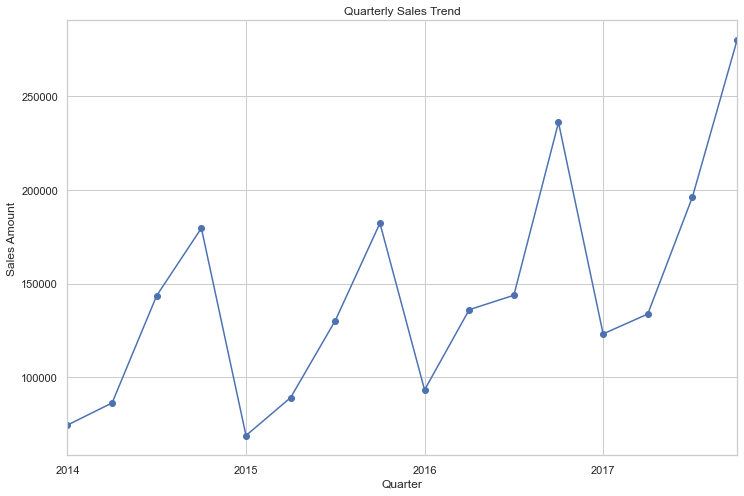

In [34]:
# Quarterly Sales Trend
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

plt.figure(figsize=(12, 8))
quarterly_sales.plot(kind='line', marker='o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')
plt.show()

The quarterly sales data mirrors the monthly trends, highlighting the significance of Q4 (holiday season) for revenue generation and Q1 as a period for strategic adjustments

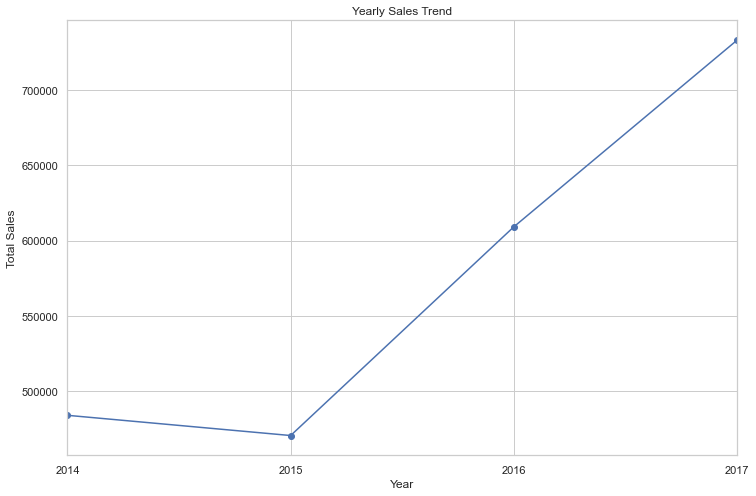

In [35]:
## Yearly Sales Trend
yearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()

plt.figure(figsize=(12, 8))
yearly_sales.plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

Except for the dip from 2014 to 2015, there is an overall upward trajectory of sales over the years, signifying sustained business growth

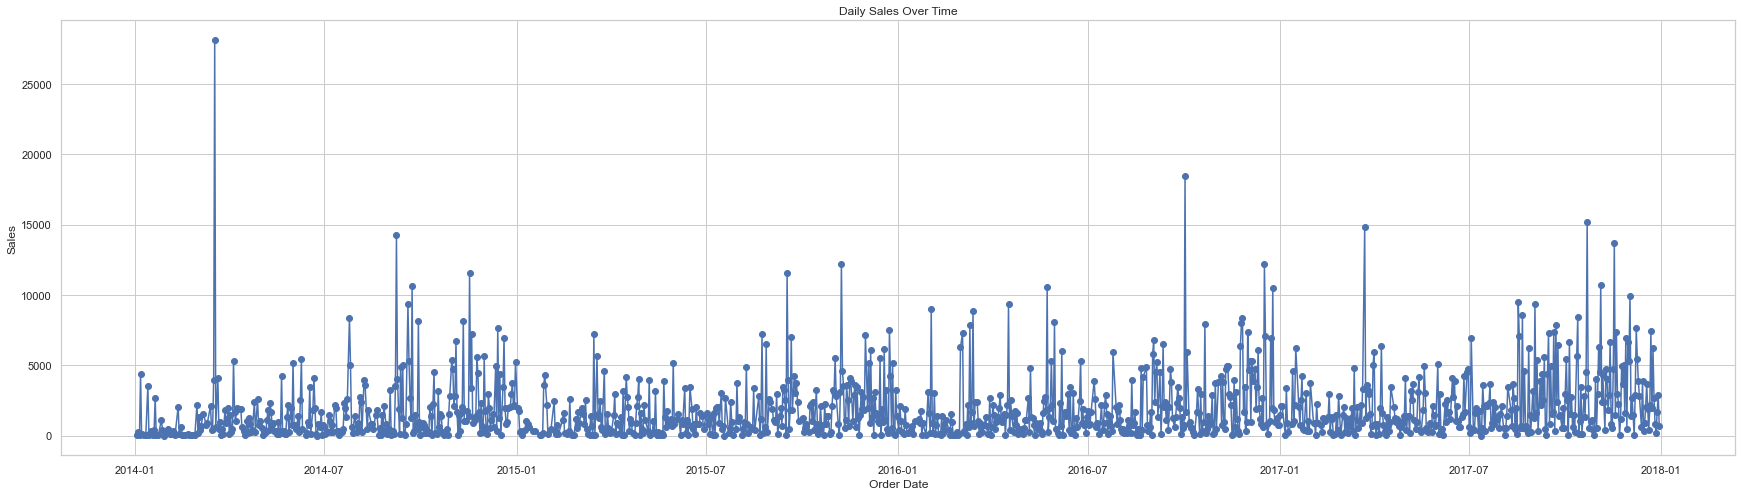

In [36]:
# Daily Sales Over Time - Group by "Order Date" and calculate the sum of sales

daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(30, 8))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], marker='o', linestyle='-')
plt.title('Daily Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### Customer Segmentation Analysis

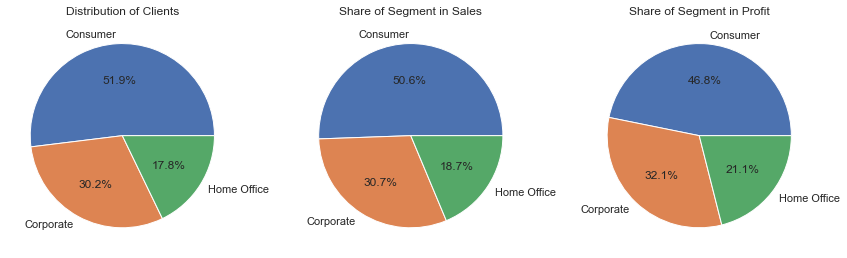

                     Sales       Profit
Segment                                
Consumer    1,161,401.3450 134,119.2092
Corporate     706,146.3668  91,979.1340
Home Office   429,371.7765  60,310.7373


In [37]:
# Size of customer segments
customer_segment = df["Segment"].value_counts()

# Sales and profit in each segment
segment_analysis = df.groupby(['Segment'])[["Sales","Profit"]].sum()

# pie charts - Share of Customers in Segments, and Share of Segments in Sales and Profit
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 6))

# Share of customers in each segment
axis[0].pie(customer_segment, labels=customer_segment.index, autopct="%1.1f%%")
axis[0].set(title = 'Distribution of Clients')

# Share of each segment in Sales
axis[1].pie(segment_analysis.Sales, labels=segment_analysis.Sales.index, autopct="%1.1f%%")
axis[1].set(title = 'Share of Segment in Sales')

# Share of each segment in Profit
axis[2].pie(segment_analysis.Profit, labels=segment_analysis.Profit.index, autopct="%1.1f%%")
axis[2].set(title = 'Share of Segment in Profit')

# Set spacing between subplots
figure.tight_layout()

# Show the plot
plt.show()

# Print the segment analysis dataframe for reference
print(segment_analysis)

The "Distribution of Clients" pie chart shows that customers are divided into three primary categories: Consumer (51.9%), Corporate (30.2%), and Home Office (17.8%). These segments reveal the diversity within the customer base and underscore the need for tailored marketing strategies.

While consumers make up over half of the customer base, they contribute to 50.8% of total sales and 46.8% of profit, closely aligning with their distribution.

Conversely, corporate clients, though only 30.2% of our base, account for a substantial 30.7% of sales and 32.1% of profit.

Home office clients, despite being the smallest segment, contribute 18.7% of sales and 21.1% of profit, indicating a higher purchase value and profit margin per transaction compared to their overall presence.


### Customer Loyalty

In [38]:
# Calculate order frequency (count) for each unique customer
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# rename the Order ID column
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

# Isolate customers who have placed more than one order
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]

# Sort repeat customers by their order frequency
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            37
1     PP-18955           Paul Prost  Home Office            34
2     JL-15835             John Lee     Consumer            34
3     MA-17560         Matt Abelman  Home Office            34
4     SV-20365          Seth Vernon     Consumer            32
5     JD-15895     Jonathan Doherty    Corporate            32
6     CK-12205  Chloris Kastensmidt     Consumer            32
7     EH-13765         Edward Hooks    Corporate            32
8     EP-13915           Emily Phan     Consumer            31
9     ZC-21910     Zuschuss Carroll     Consumer            31
10    AP-10915       Arthur Prichep     Consumer            31
11    LC-16870        Lena Cacioppo     Consumer            30


The repeat purchase behavior of customers reveals who is coming back and how often. Our analysis shows that certain customers make frequent purchases, highlighting their loyalty and the effectiveness of Super Store engagement strategies.
For example, William Brown, a consumer, tops the list with 37 orders, indicating high engagement with Super Store offerings.

### Top-Spending Customers

In [39]:
# bundle together all the purchases made by each unique customer
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Sort for the Top Spenders based on 'Sales'
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment       Sales
0    SM-20320         Sean Miller  Home Office 25,043.0500
1    TC-20980        Tamara Chand    Corporate 19,052.2180
2    RB-19360        Raymond Buch     Consumer 15,117.3390
3    TA-21385        Tom Ashbrook  Home Office 14,595.6200
4    AB-10105       Adrian Barton     Consumer 14,473.5710
5    KL-16645        Ken Lonsdale     Consumer 14,175.2290
6    SC-20095        Sanjit Chand     Consumer 14,142.3340
7    HL-15040        Hunter Lopez     Consumer 12,873.2980
8    SE-20110        Sanjit Engle     Consumer 12,209.4380
9    CC-12370  Christopher Conant     Consumer 12,129.0720


Assessing who spends the most within the customer segments provides a clear direction for resource allocation in marketing and customer service efforts.

Sean Miller, from the Home Office segment, has the highest expenditure with over $25,043 spent. This information is crucial for developing targeted strategies that cater to high-value customers.

### Shipping Preferences 

  Mode of Shipment  Use Frequency
0   Standard Class           5967
1     Second Class           1945
2      First Class           1538
3         Same Day            543



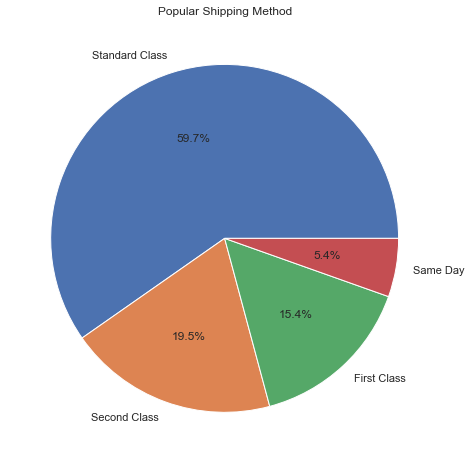

In [40]:
# Popularity of Shipping Methods

shipping_method = df['Ship Mode'].value_counts().reset_index()
shipping_method = shipping_method.rename(columns={'index':'Mode of Shipment', 'Ship Mode': 'Use Frequency'})
print(shipping_method)
print("")

# Visualize the Results
plt.figure(figsize=(12, 8))
plt.pie(shipping_method['Use Frequency'], labels=shipping_method['Mode of Shipment'], autopct='%1.1f%%')
plt.title('Popular Shipping Method') 
plt.show()

The "Popular Shipping Method" pie chart indicates that Standard Class shipping is overwhelmingly preferred, accounting for 59.7% of shipments. This is followed by Second Class at 19.5%, First Class at 15.4%, and Same Day at 5.4%.

Sales distribution by customer segment by shipping mode

Ship Mode    First Class    Same Day  Second Class  Standard Class
Segment                                                           
Consumer    159,168.9650 60,596.3590  231,498.9496    710,137.0714
Corporate   105,858.4699 45,121.3230  146,126.0388    409,040.5351
Home Office  86,400.9880 22,645.4430   81,568.5810    238,756.7645


Text(0, 0.5, 'Sales')

<Figure size 864x576 with 0 Axes>

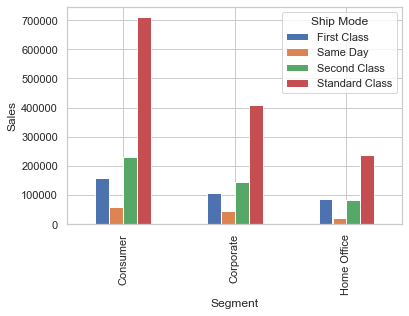

In [41]:
segment_sales_shipping_pivot = df.pivot_table(index = "Segment", columns = "Ship Mode", values = 'Sales', aggfunc = 'sum')
print(segment_sales_shipping_pivot)

plt.figure(figsize=(12, 8))
segment_sales_shipping_pivot.plot(kind = 'bar', stacked = False)
plt.ylabel("Sales")

Sales distribution by product category by shipping mode

Ship Mode        First Class    Same Day  Second Class  Standard Class
Category                                                              
Furniture       110,730.5229 39,148.7790  156,289.0244    435,550.0970
Office Supplies 101,332.3090 29,090.4810  160,683.0030    427,941.2390
Technology      139,365.5910 60,123.8650  142,221.5420    494,443.0350


Text(0, 0.5, 'Sales')

<Figure size 864x576 with 0 Axes>

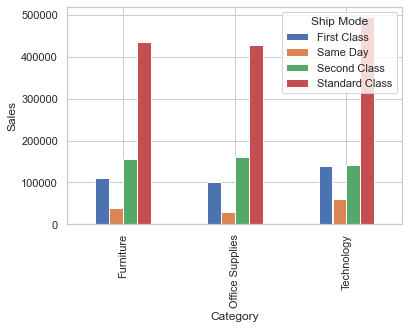

In [42]:
category_sales_shipping_pivot = df.pivot_table(index = "Category", columns = "Ship Mode", values = 'Sales', aggfunc = 'sum')
print(category_sales_shipping_pivot)

plt.figure(figsize=(12, 8))
category_sales_shipping_pivot.plot(kind = 'bar', stacked = False)
plt.ylabel("Sales")

Sales distribution by region by shipping mode

Ship Mode  First Class    Same Day  Second Class  Standard Class
Region                                                          
Central    58,746.9154 20,415.4100  103,550.0054    318,527.5600
East      113,587.0530 43,326.8320  116,545.5240    405,040.4590
South      49,332.5660 21,017.1730   93,758.6125    227,613.5535
West      129,761.8885 43,603.7100  145,339.4275    406,752.7985


Text(0, 0.5, 'Sales')

<Figure size 864x576 with 0 Axes>

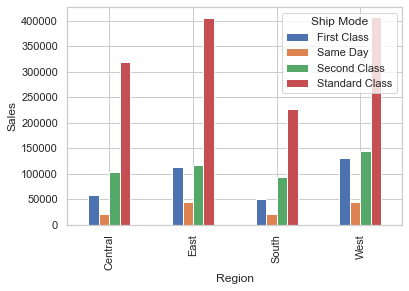

In [43]:
region_sales_shipping_pivot = df.pivot_table(index = "Region", columns = "Ship Mode", values = 'Sales', aggfunc = 'sum')
print(region_sales_shipping_pivot)

plt.figure(figsize=(12, 8))
region_sales_shipping_pivot.plot(kind = 'bar', stacked = False)
plt.ylabel("Sales")

The dominance of Standard Class shipping underscores its importance as a reliable and cost-effective option for the majority of customers. However, the presence of faster options like First Class and Same Day shipping highlights a segment of the market with different priorities—speed and convenience. The choice of First Class shipping mode is particularly significant in the West and East regions

### Geographical Analysis

Which Region is the Most Profitable?

In [44]:
region_analysis = df.groupby(['Region'])['Profit'].sum().reset_index()
region_analysis

,Region,Profit
0,Central,"39,706.3625"
1,East,"91,534.8388"
2,South,"46,749.4303"
3,West,"108,418.4489"


Share of profit per region

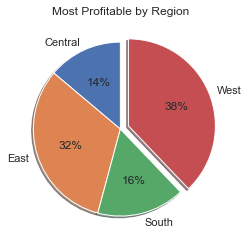

In [45]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")
plt.show()

West is the most profitable region, followed by the East. Together, they make up to 70% of the profit

Total quantity of items sold in each state

<AxesSubplot:xlabel='State'>

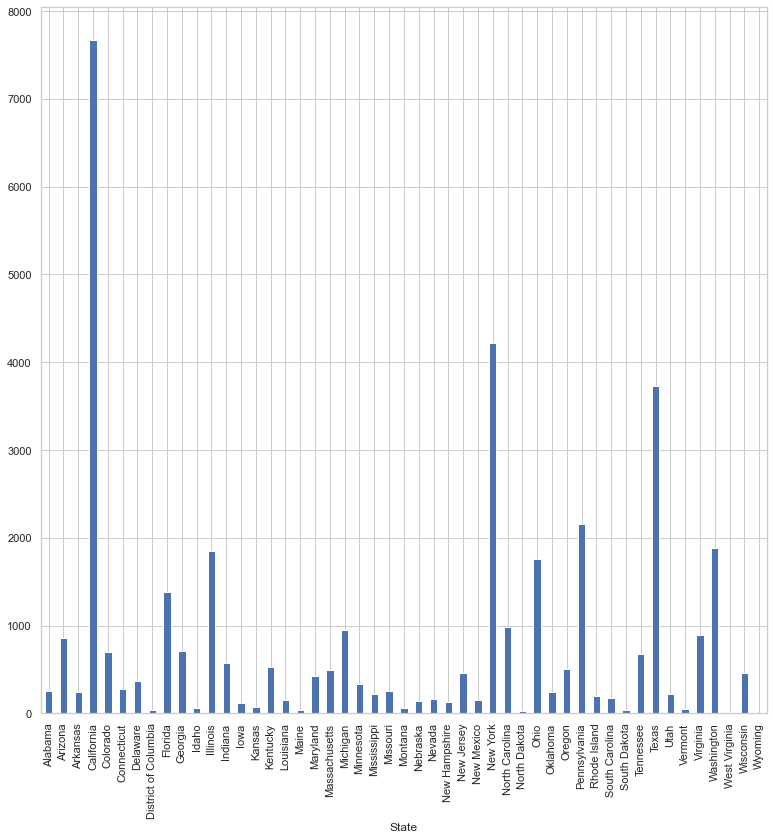

In [46]:
plt.figure(figsize=(13,13))
df.groupby("State")["Quantity"].sum().plot.bar()

The graph shows that a huge quantity of products were sold in the states of California and New York. Hence these states consist of potential customers to whom we can sell more products.

Sales, discount, and profit in each state

array([<AxesSubplot:title={'center':'Profit'}, xlabel='State'>,
       <AxesSubplot:title={'center':'Discount'}, xlabel='State'>,
       <AxesSubplot:title={'center':'Sales'}, xlabel='State'>],
      dtype=object)

<Figure size 1440x720 with 0 Axes>

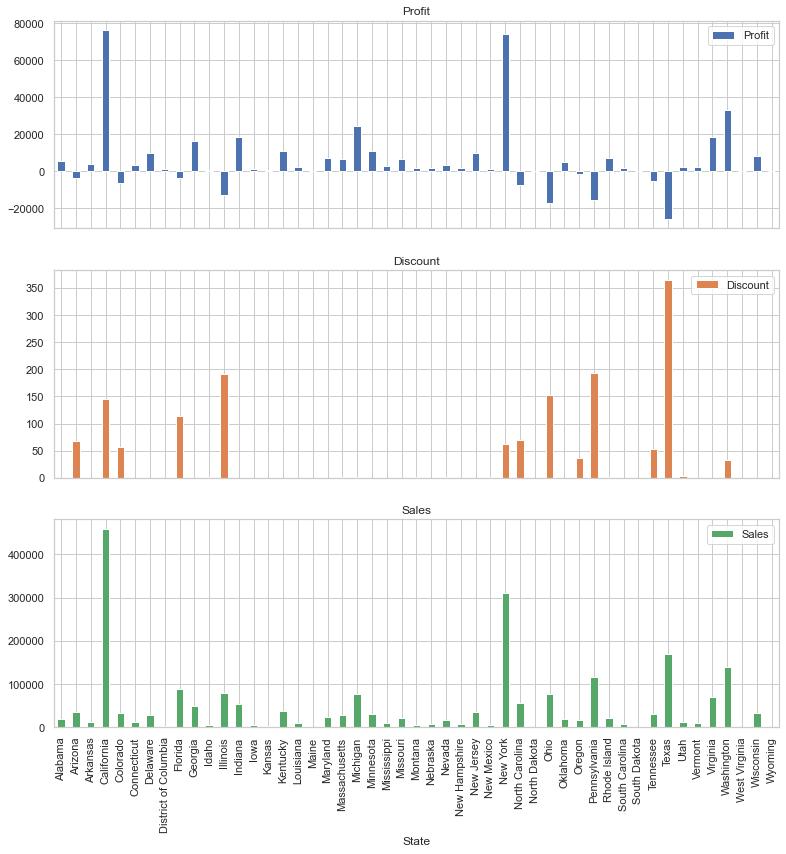

In [47]:
plt.figure(figsize=(20,10))
df.groupby("State")[["Profit","Discount","Sales"]].sum().plot.bar(subplots=True,figsize=(13,13))

The graph shows that discount and profit were inversely proportional to each other. More the discounts more the losses. It clearly shows that states with huge losses also have huge discounts, except for the states of California, New York, and a few others. These states earned a huge profit. The reason may be discounts or the people. It is predicted that more products could be sold in these states. Texas and Pennsylvania have incurred severe losses, therefore the discounts should be removed from these states and other loss-incurred states as well.

Cities with Highest and Lowest Sales

In [48]:
city_sales = df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False)
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,"256,368.1610",3417
Los Angeles,"175,851.3410",2879
Seattle,"119,540.7420",1590
San Francisco,"112,669.0920",1935
Philadelphia,"109,077.0130",1981
Houston,"64,504.7604",1466
Chicago,"48,539.5410",1132
San Diego,"47,521.0290",670
Jacksonville,"44,713.1830",429


In [49]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.3700,7
Keller,6.0000,2
Layton,4.9600,4
Springdale,4.3000,2
San Luis Obispo,3.6200,2
Ormond Beach,2.8080,3
Pensacola,2.2140,3
Jupiter,2.0640,1
Elyria,1.8240,1


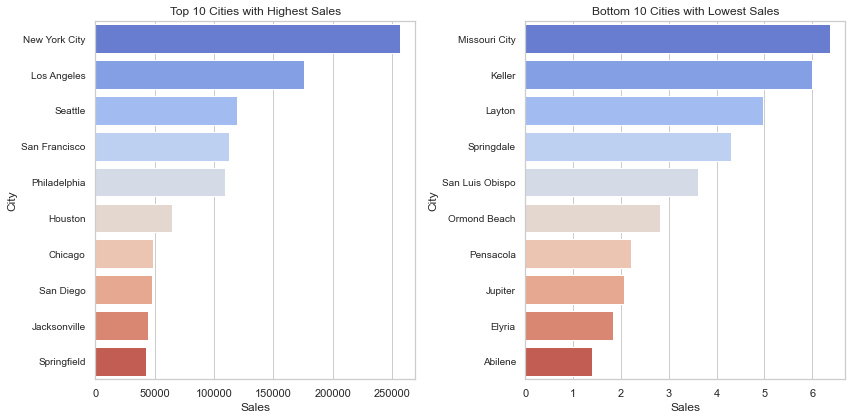

In [50]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
sns.set_theme(style="whitegrid")
top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "coolwarm", ax = axis[0])
top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)
# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.

### Discount Analysis

Find optimal discount rate that increases sales without eroding profit.

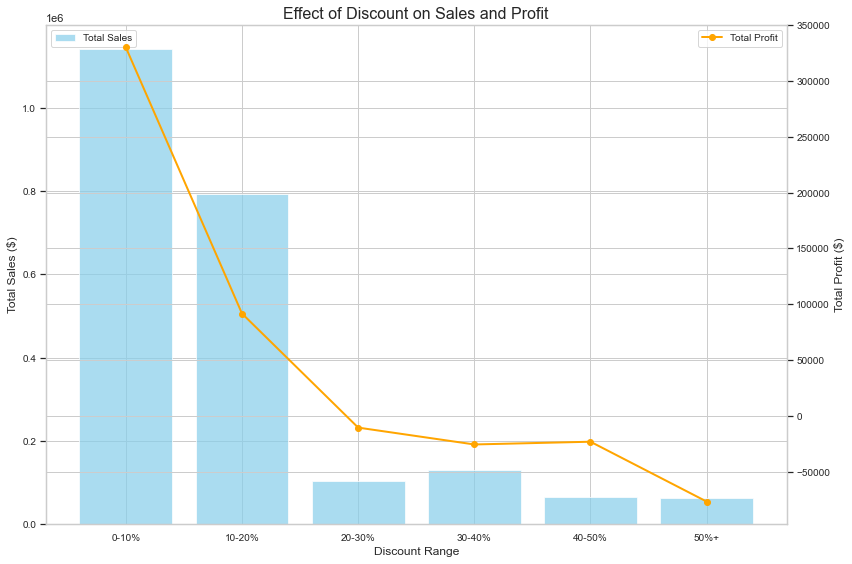

  Discount Range    Total_Sales  Total_Profit  Profit_Margin  Total_Quantity
0          0-10% 1,142,277.8210  330,016.7802        28.8911           18640
1         10-20%   792,152.8895   91,756.2975        11.5832           13858
2         20-30%   102,945.2830  -10,357.2186       -10.0609             847
3         30-40%   130,911.2428  -25,448.1881       -19.4393             891
4         40-50%    64,403.5140  -22,999.5392       -35.7116             286
5           50%+    64,228.7380  -76,559.0513      -119.1975            3349


In [51]:
# Define discount bins and labels
discount_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
discount_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']

# Bin the discounts
df['Discount Range'] = pd.cut(df['Discount'], bins=discount_bins, labels=discount_labels, include_lowest=True)

# Group by discount range and calculate metrics
discount_analysis = df.groupby('Discount Range').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Profit_Margin=('Profit', lambda x: (x.sum() / df[df['Profit'].index.isin(x.index)]['Sales'].sum()) * 100),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot total sales and profit
ax1.bar(discount_analysis['Discount Range'], discount_analysis['Total_Sales'], color='skyblue', label='Total Sales', alpha=0.7)
ax1.set_ylabel('Total Sales ($)', fontsize=12)
ax1.set_xlabel('Discount Range', fontsize=12)
ax1.tick_params(axis='y', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.legend(loc='upper left', fontsize=10)

# Create a secondary axis for total profit
ax2 = ax1.twinx()
ax2.plot(discount_analysis['Discount Range'], discount_analysis['Total_Profit'], color='orange', label='Total Profit', marker='o', linewidth=2)
ax2.set_ylabel('Total Profit ($)', fontsize=12)
ax2.tick_params(axis='y', labelsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Add a title
plt.title('Effect of Discount on Sales and Profit', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

# Print the analysis dataframe for reference
print(discount_analysis)

Discount levels beyond the 10-20% would hurt profit

# Conclusion

Key findings from the analysis of Super Store sales data are as follows:

1. The most sales occur in Q4, particularly in December, coinciding with the holiday season. Conversely, Q1 sees the lowest sales, particularly in January. The highest monthly sales recorded were during the holiday season.
2. California and New York are the top-performing states in terms of both sales and profit. Texas and Pennsylvania, on the other hand, incur the highest losses despite significant sales volume.
3. Office Supplies lead in quantity sold but generate lower profits compared to Technology, which is the most profitable category. Furniture is the least profitable despite comparable sales volumes.
4. Copiers, Phones, and Accessories are the top profit-contributing sub-categories, while Tables, Bookcases, and Supplies generate close to zero profit or incur losses.
5. Discounts have a direct negative impact on profit margins. High discount rates (beyond 20%) erode profitability significantly.
6. Standard Class shipping is the most preferred mode (59.7%), followed by Second Class and First Class. Same Day shipping accounts for the smallest share (5.4%).

## Recommendations for Action

1. ### Seasonal Strategies:

- Focus marketing and promotional efforts during Q4 to maximize revenue from the holiday season.
- Implement strategic adjustments in Q1 to boost sales, such as limited-time discounts or bundled offers.

2. ### Regional Focus:

- Increase investments and promotional efforts in high-performing states like California and New York to further amplify sales.
- Address losses in states like Texas and Pennsylvania by revising discount policies, enhancing marketing, or renegotiating supplier costs.

3. ### Product Portfolio Optimization:

- Promote high-profit products like Copiers, Phones, and Accessories through dedicated campaigns and bundled offers.
- Reevaluate or remove underperforming products like Tables and Bookcases, or increase their price to improve margins.

4. ### Discount Policy:

- Limit discounts to a maximum of 10-20% to maintain profitability.
- Gradually reduce discounts in loss-incurring states while maintaining customer retention efforts.

5. ### Shipping Enhancements:

- Optimize the Standard Class shipping experience to retain its dominant preference.
- Introduce targeted promotions for First Class and Same Day shipping to attract customers prioritizing speed and convenience.

6. ### Customer Segmentation:

- Build tailored loyalty programs for high-value customers like Sean Miller and frequent buyers such as William Brown.
- Use data-driven insights to identify and nurture relationships with repeat customers to ensure long-term profitability.

These actions, aligned with the data-driven insights from the analysis, can help Super Store capitalize on growth opportunities, optimize resource allocation, and address underperformance areas effectively.

In [52]:
%watermark -a "AmeduStephen"

Author: AmeduStephen



In [53]:
%watermark

Last updated: 2025-01-04T17:05:35.749288+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
CPU cores   : 4
Architecture: 64bit



# The End